# PMSM Motor

* Controlled Three-Phase Drives Prof. Dr.-Ing. Joachim Böcker
* Paderborn University Power Electronics and Electrical Drives
* Lecture Notes Last Update 2016-01-26
* New method of direct reactive energy and torque control for permanent magnet synchronous motor 
  * M. JANASZEK
  * BULLETIN OF THE POLISH ACADEMY OF SCIENCES TECHNICAL SCIENCES
  * Vol. 54, No. 3, 2006
* 永磁同步电机高效V_F控制方法研究 朱明东
  * ***Active current*** ***deactive Current**** Page 26

## $ABC$  axis

### motor parameter

In [ ]:
Rs = 0.8
Rr = 0.6
Ls = 0.085
Lr = 0.085
Lm = 0.082
pole = 4
J = 0.033
B = 0.00825
w = Ls*Lr - Lm**2  # Note: Python uses ** for exponentiation instead of ^
Lsigma = w/Lr
sigma = 1 - Lm**2/(Ls*Lr)
Tr = Lr/Rr
K1 = (-Rs*Lr**2-Rr*Lm**2)/(Lr*w)
K2 = (Rr*Lm)/(Lr*w)
K3 = Lm/w
K4 = Lr/w
K5 = Rr*Lm/Lr
K6 = -Rr/Lr

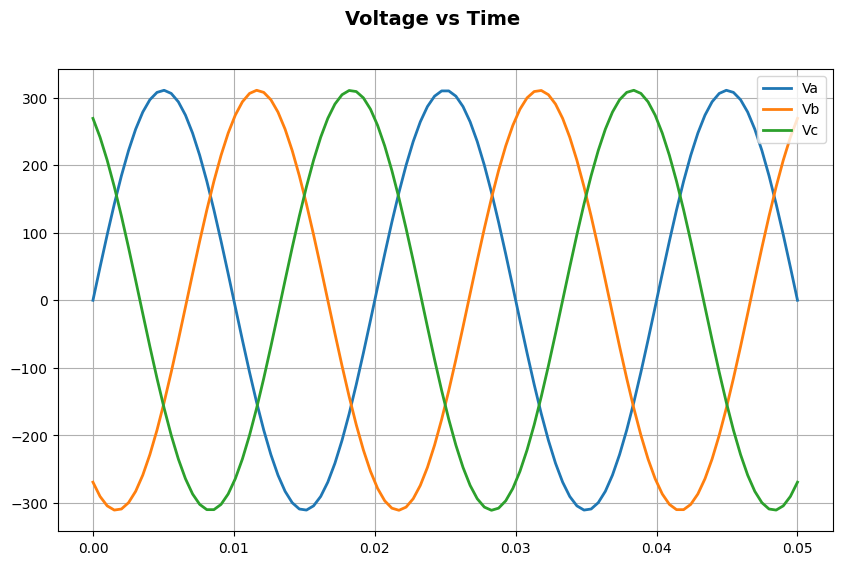

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 0.05, 100)
va = 220 * 1.414 * np.sin(2 * np.pi * 50 * t)
vb = 220 * 1.414 * np.sin(2 * np.pi * 50 * t - 2 * np.pi/3)
vc = 220 * 1.414 * np.sin(2 * np.pi * 50 * t - 4 * np.pi/3)

fig=plt.figure(figsize=(10, 6))  # Set figure size to 10 inches wide, 6 inches tall
fig.figure.suptitle('Voltage vs Time', fontsize=14, fontweight='bold')  # Set figure title and font size
plt.plot(t, va, t, vb, t, vc, linewidth=2)
plt.legend(['Va', 'Vb', 'Vc'])
plt.grid()
plt.show()

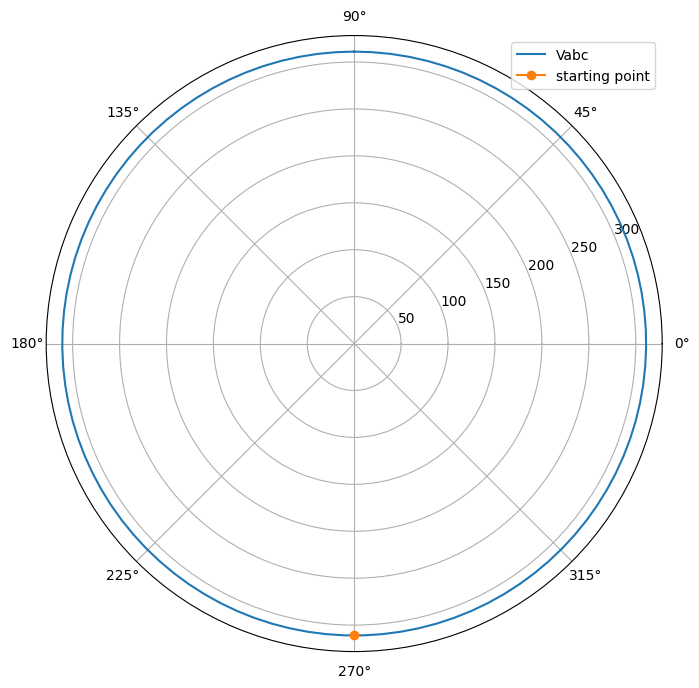

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 0.02, 100)
va = 220 * 1.414 * np.sin(2 * np.pi * 50 * t)
vb = 220 * 1.414 * np.sin(2 * np.pi * 50 * t + 2 * np.pi/3)
vc = 220 * 1.414 * np.sin(2 * np.pi * 50 * t - 2 * np.pi/3)
vabc = 2/3 * (va + np.exp(1j * 2 * np.pi/3) * vb + np.exp(1j * 4 * np.pi/3) * vc)

plt.figure(figsize=(8, 8))
plt.polar(np.angle(vabc), np.abs(vabc))
t1 = 0.5 * (1/50)
va1 = 220 * 1.414 * np.sin(2 * np.pi * 50 * t1)
vb1 = 220 * 1.414 * np.sin(2 * np.pi * 50 * t1 + 2 * np.pi/3)
vc1 = 220 * 1.414 * np.sin(2 * np.pi * 50 * t1 - 2 * np.pi/3)
vabc1 = 2/3 * (va1 + np.exp(1j * 2 * np.pi/3) * vb1 + np.exp(1j * 4 * np.pi/3) * vc1)

plt.polar(np.angle(vabc1), np.abs(vabc1), '-o')
plt.legend(['Vabc', 'starting point'])
plt.show()

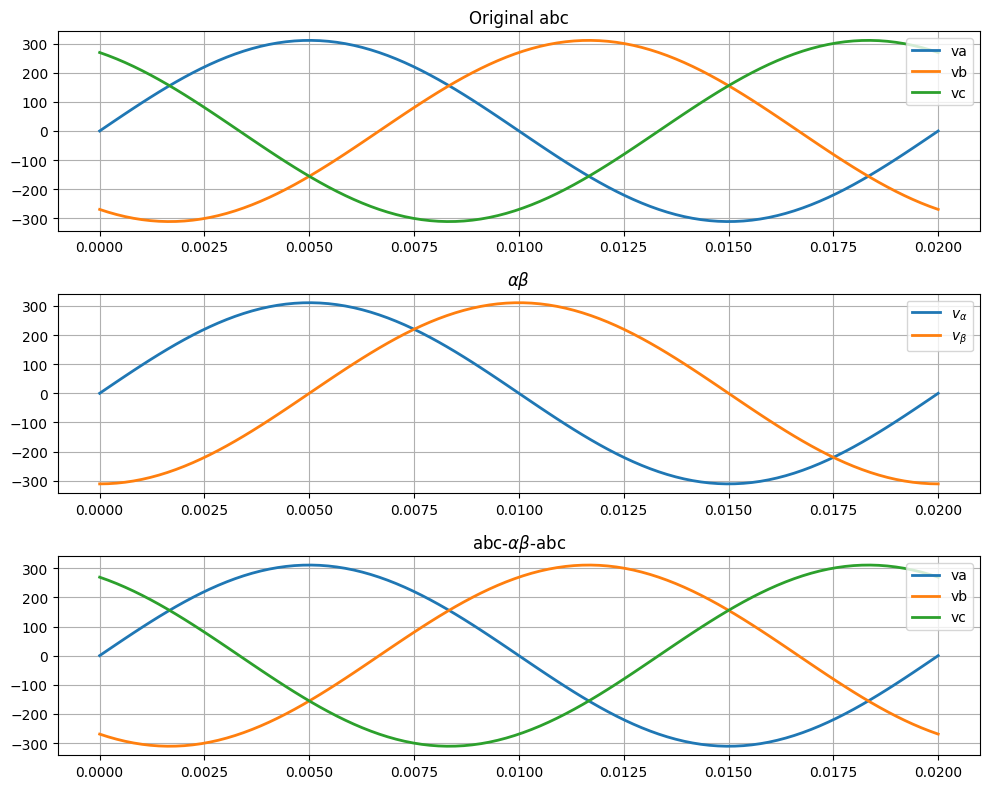

In [12]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 0.02, 100)
va = 220 * 1.414 * np.sin(2 * np.pi * 50 * t)
vb = 220 * 1.414 * np.sin(2 * np.pi * 50 * t - 2 * np.pi/3)
vc = 220 * 1.414 * np.sin(2 * np.pi * 50 * t - 4 * np.pi/3)

v_alpha = 2/3 * (1*va - 0.5*vb - 0.5*vc)
v_beta = 2/3 * (np.sqrt(3)/2*vb - np.sqrt(3)/2*vc)
v_zero = 2/3 * (0.5*va + 0.5*vb + 0.5*vc)

va1 = v_alpha + v_zero
vb1 = -0.5*v_alpha + np.sqrt(3)/2*v_beta + v_zero
vc1 = -0.5*v_alpha - np.sqrt(3)/2*v_beta + v_zero

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, va, t, vb, t, vc, linewidth=2)
plt.legend(['va', 'vb', 'vc'])
plt.grid()
plt.title('Original abc')

plt.subplot(3, 1, 2)
plt.plot(t, v_alpha, t, v_beta, linewidth=2)
plt.legend([r'$v_\alpha$', r'$v_\beta$'])
plt.grid()
plt.title(r'$\alpha\beta$')

plt.subplot(3, 1, 3)
plt.plot(t, va1, t, vb1, t, vc1, linewidth=2)
plt.legend(['va', 'vb', 'vc'])
plt.grid()
plt.title(r'abc-$\alpha\beta$-abc')

plt.tight_layout()
plt.show()

In [13]:
import numpy as np

t1 = 0.001
va = 220 * 1.414 * np.sin(2 * np.pi * 50 * t1)
vb = 220 * 1.414 * np.sin(2 * np.pi * 50 * t1 - 2 * np.pi/3)
vc = 220 * 1.414 * np.sin(2 * np.pi * 50 * t1 - 4 * np.pi/3)

vabc1 = 2/3 * (va + np.exp(1j * 2 * np.pi/3) * vb + np.exp(1j * 4 * np.pi/3) * vc)
rho = np.abs(vabc1)
theta = np.angle(vabc1) * 180/np.pi

v_alpha = 2/3 * (1*va - 0.5*vb - 0.5*vc)
v_beta = 2/3 * (np.sqrt(3)/2*vb - np.sqrt(3)/2*vc)
v_zero = 2/3 * (0.5*va + 0.5*vb + 0.5*vc)

va1 = v_alpha + v_zero
vb1 = -0.5*v_alpha + np.sqrt(3)/2*v_beta + v_zero
vc1 = -0.5*v_alpha - np.sqrt(3)/2*v_beta + v_zero

print(f'The space vector Vabc: abs(Vabc) = {rho:.2f}, angle(Vabc) = {theta:.2f}')
print(f'V_alpha of Vabc is {v_alpha:.2f}, V_beta of Vabc is {v_beta:.2f}')
print(f'Va of Vabc is {va1:.2f}, Vb of Vabc is {vb1:.2f}, Vc of Vabc is {vc1:.2f}')

The space vector Vabc: abs(Vabc) = 311.08, angle(Vabc) = -72.00
V_alpha of Vabc is 96.13, V_beta of Vabc is -295.85
Va of Vabc is 96.13, Vb of Vabc is -304.28, Vc of Vabc is 208.15


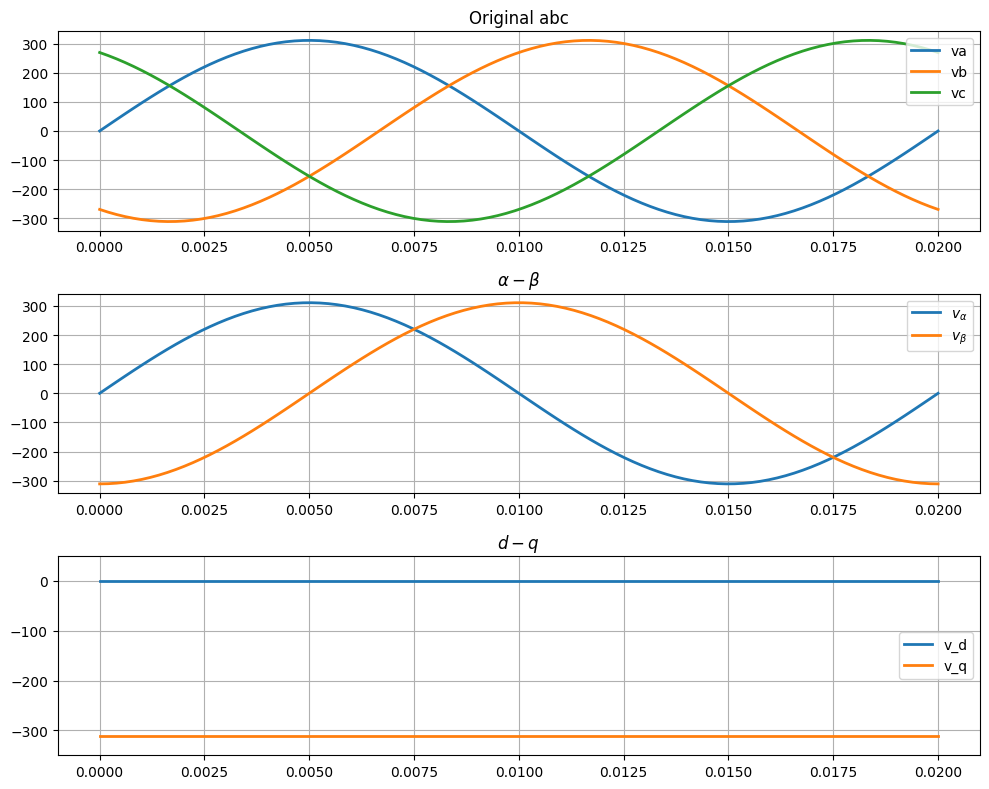

In [16]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 0.02, 100)
va = 220 * 1.414 * np.sin(2 * np.pi * 50 * t)
vb = 220 * 1.414 * np.sin(2 * np.pi * 50 * t - 2 * np.pi/3)
vc = 220 * 1.414 * np.sin(2 * np.pi * 50 * t - 4 * np.pi/3)

v_alpha = 2/3 * (1*va - 0.5*vb - 0.5*vc)
v_beta = 2/3 * (np.sqrt(3)/2*vb - np.sqrt(3)/2*vc)
v_zero = 2/3 * (0.5*va + 0.5*vb + 0.5*vc)

gamma = 2 * np.pi * 50 * t
v_d = np.cos(gamma) * v_alpha + np.sin(gamma) * v_beta
v_q = -np.sin(gamma) * v_alpha + np.cos(gamma) * v_beta

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, va, t, vb, t, vc, linewidth=2)
plt.legend(['va', 'vb', 'vc'])
plt.grid()
plt.title('Original abc')

plt.subplot(3, 1, 2)
plt.plot(t, v_alpha, t, v_beta, linewidth=2)
plt.legend([r'$v_\alpha$', r'$v_\beta$'])
plt.grid()
plt.title(r'$\alpha-\beta$')

plt.subplot(3, 1, 3)
plt.plot(t, v_d, t, v_q, linewidth=2)
plt.ylim([-350, 50])
plt.legend(['v_d', 'v_q'])
plt.grid()
plt.title(r'$d-q$')

plt.tight_layout()
plt.show()

Bandwidth of the loop: 3134.7890826644734 rad/s
<class 'control.xferfcn.TransferFunction'>


TypeError: iter() returned non-iterator of type 'numpy.ndarray'

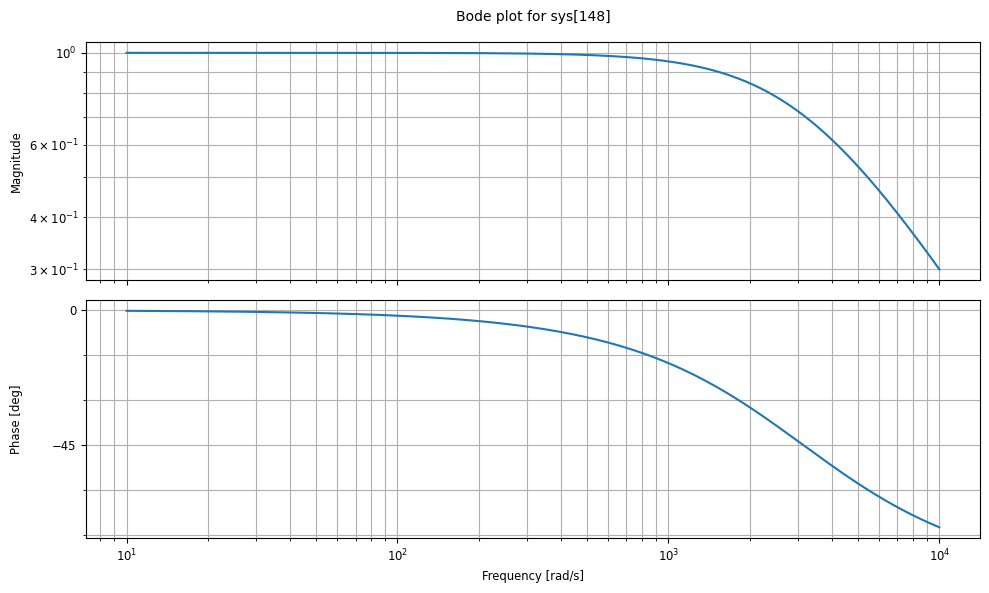

In [ ]:
# m3_1_1
import control as ct
import numpy as np

# Assuming these variables are defined elsewhere in your code
Rs = 0.8
Rr = 0.6
Ls = 0.085
Lr = 0.085
Lm = 0.082
pole = 4
J = 0.033
B = 0.00825
w = Ls*Lr - Lm*Lm
Lsigma = w/Lr
sigma = 1 - Lm*Lm/(Ls*Lr)
Tr = Lr/Rr

S_id = 730232
Kp_id = 0.0043
Ki_id = 1

# Create PID controller
PID_id = S_id * ct.tf([Kp_id, Ki_id], [1, 0])

# Create plant model
plant_id = ct.tf(1, [1, (Rs/Lsigma + (1-sigma)/(sigma*Tr))])

# Create closed-loop system
loop_id = ct.feedback(ct.series(PID_id, plant_id), 1)

# Calculate bandwidth
BW_loop_id = ct.bandwidth(loop_id)
print(f"Bandwidth of the loop: {BW_loop_id} rad/s")

# Plot Bode diagram
# plt.figure(figsize=(10, 6))
# # mag, phase, omega = 
# ct.bode_plot(loop_id, dB=True, Hz=False, display_margins=True,grid=True)
# # ct.bode(loop_id, dB=True, Hz=False, display_margins=True)
# plt.grid(True, which='both', axis='both', linestyle='--', alpha=0.7)  # Add grid lines
# plt.tight_layout()
# plt.grid()
# plt.show()
# Plot Bode diagram with customized grid for magnitude
plt.figure(figsize=(10, 6))
mag, phase, omega = ct.bode(loop_id)
# mag, phase, omega = ct.bode(loop_id, dB=True, Hz=False, display_margins=True)

# Custom grid settings for magnitude plot
plt.subplot(2, 1, 1)  # Magnitude plot (top subplot)
plt.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)
plt.minorticks_on()

plt.subplot(2, 1, 2)  # Phase plot (bottom subplot)
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

## $\alpha$ $\beta$  axis





### $\alpha$ $\beta$ Flux

$
\Psi_{p}=2*N*r*l*b_p \\
$\
$
\Psi_{p\alpha }=\Psi_{p} *\cos(\omega_{e}t ) \\
\Psi_{p\beta } =\Psi_{p} *\sin(\omega_{e}t ) \\
$\
$
\Psi_{s\alpha }=L_s*I_{\alpha }+\Psi_{p\alpha } \\
\Psi_{s\beta }=L_s*I_{\beta }+\Psi_{p\beta }\\
$\
$
\Psi_{s\alpha }=L_s*I_{\alpha }+\Psi_{p} *\cos(\omega_{e}t ) \\
\Psi_{s\beta } =L_s*I_{\beta }+\Psi_{p} *\sin(\omega_{e}t ) \\
$

### $\alpha$ $\beta$ Voltage

$
U_{\alpha } =R_{s}*I_{\alpha }+\frac{\mathrm{d} \Psi_{s\alpha }}{\mathrm{d} t} \\
U_{\beta } =R_{s}*I_{\beta }+\frac{\mathrm{d} \Psi_{s\beta }}{\mathrm{d} t} \\
$\
$
\psi_{s\alpha } =\int (U_{\alpha } -R_{s}*I_{\alpha })dt \\
\psi_{s\beta } =\int (U_{\beta } -R_{s}*I_{\beta })dt \\
$

$
U_{\alpha } =R_{s}*I_{\alpha }+L_{s}*\frac{\mathrm{d} I_{\alpha }}{\mathrm{d} t} -\Psi_{p} \omega_{e} *\sin (\omega_{e}t ) \\
U_{\beta  } =R_{s}*I_{\beta  }+L_{s}*\frac{\mathrm{d} I_{\beta  }}{\mathrm{d} t} +\Psi_{p} \omega_{e} *\cos(\omega_{e}t ) \\
$\
$
\theta=\omega_{e}t \\
$\
$
U_{\alpha } =R_{s}*I_{\alpha }+L_{s}*\frac{\mathrm{d} I_{\alpha }}{\mathrm{d} t} -\Psi_{p} \omega_{e} *\sin (\theta ) \\
U_{\beta  } =R_{s}*I_{\beta  }+L_{s}*\frac{\mathrm{d} I_{\beta  }}{\mathrm{d} t} +\Psi_{p} \omega_{e} *\cos(\theta ) \\
$


<img src="./Voltage_alpha_beta.png">

$
e_{\alpha } = -\Psi_{p} \omega_{e} *\sin (\theta ) \\
e_{\beta  } =\Psi_{p} \omega_{e} *\cos(\theta ) \\
$\
$
U_{\alpha}=R_si_s+L_s\frac{di_{\alpha}}{dt}+e_{\alpha } \\
U_{\beta}=R_si_{\beta}+L_s\frac{di_{\beta}}{dt}+e_{\beta  } \\
$\
$
\frac{di_{\alpha}}{dt}=-\frac{R}{L}i_{\alpha}-\frac{1}{L}e_{\alpha }+\frac{1}{L}U_{\alpha} \\
\frac{di_{\beta}}{dt}=-\frac{R}{L}i_{\beta}-\frac{1}{L}e_{\beta }+\frac{1}{L}U_{\beta} \\
$

### $\alpha$ $\beta$ Power

#### $\alpha$ $\beta$ Active Power

$P=I_s\cdot U_{s}=I_{\alpha} U_{\alpha}+I_{\beta}U_{\beta}$\
$Q=I_s\times U_{s}=I_{\alpha} U_{\beta}-I_{\beta}U_{\alpha}$

$ \vec{U} =U_{\alpha}+jU_{\beta}=\frac{2}{3}(U_A+aU_B+a^2U_C)$\
$U_A+U_B+U_C=0$\
$ \vec{I} =I_{\alpha}+jI_{\beta}=\frac{2}{3}(I_A+aI_B+a^2I_C)$\
$I_A+I_B+I_C=0$\
$ \vec{\psi} =\psi_{\alpha}+j\psi_{\beta}=\frac{2}{3}(\psi_A+a\psi_B+a^2\psi_C)$\
$\psi_A+\psi_B+psi_C=0$\
$a=e^{j\frac{2}{3}\pi}=cos(\frac{2}{3}\pi)+jsin(\frac{2}{3}\pi)=-0.5+j\frac{\sqrt{3}}{2}$\
$a^2=e^{j\frac{4}{3}\pi}=cos(\frac{4}{3}\pi)+jsin(\frac{4}{3}\pi)=-0.5-j\frac{\sqrt{3}}{2}$\
$P=\frac{3}{2}p(\psi_{\alpha}+j\psi_{\beta})(I_{\alpha}-jI_{\beta})$\
$P=\frac{3}{2}p[\psi_{\alpha}I_{\alpha}+\psi_{\beta}I_{\beta}-j(\psi_{\alpha}I_{\beta}-\psi_{\beta}I_{\alpha})]$\
***Reactive energy of magnetic circuit***:\
$Q=\frac{3}{2}p(\psi_{\alpha}I_{\alpha}+\psi_{\beta}I_{\beta})$\
***Electromagnetic torque***:\
$T=\frac{3}{2}p(\psi_{\alpha}I_{\beta}-\psi_{\beta}I_{\alpha})$



#### $\alpha$ $\beta$ Deactive Power

### $\alpha$ $\beta$ Torque

$
P_{el} =P_{V} +\frac{\mathrm{d} E_{mag }}{\mathrm{d} t} +P_{me} \\
P_{el} =U_{\alpha}*I_{\alpha }+U_{\beta}*I_{\beta } \\
P_{V} =R_{s}*I_{\alpha }^2+R_{s}*I_{\beta  }^2 \\
P_{me} =\omega_{e}*T=-I_{\alpha}*\Psi_{p} \omega_{e} *\sin (\theta ) + I_{\beta }*\Psi_{p} \omega_{e} *\cos(\theta ) \\
T =-I_{\alpha}*\Psi_{p}  *\sin (\theta ) + I_{\beta }*\Psi_{p}  *\cos(\theta) \\
T =-I_{\alpha}*\Psi_{p\beta} + I_{\beta }*\Psi_{p\alpha} \\
$


<img src="./Torque_alpha_beta.png">

* $\Psi_{\alpha, \beta}$    --- flux linkage
* $i_{\alpha, \beta}$       ---current
* $e_{\alpha, \beta}$       ---electromotive force
* $U_{\alpha, \beta}$       --- voltage for each phase in the stator fixed reference frame
* $R$ and $L$               --- phase resistance and inductance
* $\Psi_{p} $               ---magnetic flux
* $\omega_{e} $             --- electric angular velocity
* $\theta{e} $              ---the rotor position(in electrical angle) of the PMSM
* $p $                     ---pole pair number 


$
U_{\alpha}*I_{\alpha} =R_{s}*I_{\alpha }^2+L_{s}*I_{\alpha }*\frac{\mathrm{d} I_{\alpha }}{\mathrm{d} t} -I_{\alpha}*\Psi_{p} \omega_{e} *\sin (\omega_{e}t ) \\
U_{\beta}*I_{\beta } =R_{s}*I_{\beta  }^2+L_{s}*I_{\beta }*\frac{\mathrm{d} I_{\beta  }}{\mathrm{d} t} +I_{\beta }*\Psi_{p} \omega_{e} *\cos(\omega_{e}t ) \\
$


$
P_{el} =P_{V} +\frac{\mathrm{d} E_{mag }}{\mathrm{d} t} +P_{me} \\
P_{el} =U_{\alpha}*I_{\alpha }+U_{\beta}*I_{\beta } \\
P_{V} =R_{s}*I_{\alpha }^2+R_{s}*I_{\beta  }^2 \\
P_{me} =\omega_{e}*T=-I_{\alpha}*\Psi_{p} \omega_{e} *\sin (\theta ) + I_{\beta }*\Psi_{p} \omega_{e} *\cos(\theta ) \\
T =-I_{\alpha}*\Psi_{p}  *\sin (\theta ) + I_{\beta }*\Psi_{p}  *\cos(\theta) \\
T =-I_{\alpha}*\Psi_{p\beta} + I_{\beta }*\Psi_{p\alpha} \\
$


## D Q  axis





### D Q Flux

$
\Psi_{d}=L_{d}*I_{d}+\Psi_{p} \\
\Psi_{q}=L_{q}*I_{q} \\
$

$
\frac{\mathrm{d} \Psi_{d }}{\mathrm{d} t}=L_{d}*\frac{\mathrm{d} I_{d }}{\mathrm{d} t}\\
\frac{\mathrm{d} \Psi_{q }}{\mathrm{d} t}=L_{q}*\frac{\mathrm{d} I_{q }}{\mathrm{d} t}\\
$

### D Q Voltage

$
U_d =R_{s}*I_d+\frac{\mathrm{d} \Psi_{d }}{\mathrm{d} t} - \omega_{e} *\Psi_{q } \\
U_q =R_{s}*I_q+\frac{\mathrm{d} \Psi_{q }}{\mathrm{d} t} + \omega_{e} *\Psi_{d }\\
$

$
U_d =R_{s}*I_d+L_{d}*\frac{\mathrm{d} I_{d }}{\mathrm{d} t} - \omega_{e} *L_{q}*I_{q} \\
U_q =R_{s}*I_q+L_{q}*\frac{\mathrm{d} I_{q }}{\mathrm{d} t} + \omega_{e} *(L_{d}*I_{d}+\Psi_{p})\\
$

<img src="./Voltage_d_q.png">

### Torque





### DQ Power





$
U_d =R_{s}*I_s+e_{sp}+\frac{\mathrm{d} \psi_{sp }}{\mathrm{d} t} \\
U_q =e_{sq}+\frac{\mathrm{d} \psi_{sq }}{\mathrm{d} t}\\
$

$P=I_sU_{sp}=R_sI_s^2+e_{sp}I_s+\frac{d\psi_{sp}}{d_t}$\
$Q=I_sU_{sq}=e_{sq}I_s+\frac{d\psi_{sq}}{d_t}I_s$

## Torque

* ***DQ Axes***\
$T_e=\frac{3}{2}n_p[\Psi_p*i_q+(L_d-L_q)i_d*i_q]$
* ***Mechnical Torque***\
$T_e=T_l+B*\omega_m+J*\frac{d}{dt}\omega_m$

## $\gamma \delta$  axis





### $\gamma \delta$  axis voltage







$
    \begin{bmatrix}
        U\gamma\\
        U\delta \\
    \end{bmatrix}
    =
    \begin{bmatrix}
        R+s*L_d                     & -\omega_{\gamma\delta}L_q\\
        \omega_{\gamma\delta}L_q    &  R+s*L_d\\
    \end{bmatrix}*
    \begin{bmatrix}
        I_{\gamma} \\
        I_{\delta} \\
    \end{bmatrix}+K_v\omega_{\gamma\delta}
     \begin{bmatrix}
        -sin(\theta_{err}) \\
        cos(\theta_{err}) \\
    \end{bmatrix}
$ 


$
U_{\gamma} =R_{s}*I_{\gamma}+L_{d}*\frac{\mathrm{d} I_{\gamma }}{\mathrm{d} t}-\omega_{\gamma\delta}*L_q*I_{\delta}-K_v\omega_{\gamma\delta}sin(\theta_{err})\\
U_{\delta} =R_{s}*I_{\delta}+L_{d}*\frac{\mathrm{d} I_{\delta }}{\mathrm{d} t}+\omega_{\gamma\delta}*L_q*I_{\gamma}+K_v\omega_{\gamma\delta}cos(\theta_{err})\\
$

$
U_{\gamma}(t) =R_{s}*I_{\gamma}(t)+L_{d}*\frac{\mathrm{d} I_{\gamma }}{\mathrm{d} t}-\omega_{\gamma\delta}(t)*L_q*I_{\delta}(t)-e_\gamma(t)\\
U_{\delta}(t) =R_{s}*I_{\delta}(t)+L_{d}*\frac{\mathrm{d} I_{\delta }}{\mathrm{d} t}+\omega_{\gamma\delta}(t)*L_q*I_{\gamma}(t)+e_\delta(t)\\
$


$
U_d =R_{s}*I_d+\frac{\mathrm{d} \Psi_{d }}{\mathrm{d} t} - \omega_{e} *\Psi_{q } \\
U_q =R_{s}*I_q+\frac{\mathrm{d} \Psi_{q }}{\mathrm{d} t} + \omega_{e} *\Psi_{d }\\
$

## Moto Paramter

* https://ww2.mathworks.cn/help/sps/ug/parameterize-a-permanent-magnet-synchronous-motor.html;jsessionid=45047ed607e68a4d1c3d8fde02bb

### Voltage Constant

$
U_{\alpha } =R_{s}*I_{\alpha }+L_{s}*\frac{\mathrm{d} I_{\alpha }}{\mathrm{d} t} -\Psi_{p} \omega_{e} *\sin (\omega_{e}t ) \\
U_{\beta  } =R_{s}*I_{\beta  }+L_{s}*\frac{\mathrm{d} I_{\beta  }}{\mathrm{d} t} +\Psi_{p} \omega_{e} *\cos(\omega_{e}t ) \\
$\
$
U_{\alpha } =R_{s}*I_{\alpha }+L_{s}*\frac{\mathrm{d} I_{\alpha }}{\mathrm{d} t} -K_V \omega_{e} *\sin (\omega_{e}t ) \\
U_{\beta  } =R_{s}*I_{\beta  }+L_{s}*\frac{\mathrm{d} I_{\beta  }}{\mathrm{d} t} +K_V \omega_{e} *\cos(\omega_{e}t ) \\
$\
$
e_{\alpha } = -\Psi_{p} \omega_{e} *\sin (\theta )= -K_V \omega_{e} *\sin (\theta )\\
e_{\beta  } =\Psi_{p} \omega_{e} *\cos(\theta )=K_V \omega_{e} *\cos(\theta ) \\
$




$
K_{V} =\frac{V_{a\_pk}}{\omega_m}  \\
$
* $K_V$ BEMF coeffactor [$\frac{V}{\frac{rad}{s}}$]

$
K_{e} =\frac{V_{a\_pk}}{\omega_m}  \\
K_{e} =\frac{V_{a\_pk}}{2*\pi*f_m}=\frac{V_{a\_pk}}{2*\pi*\frac{f_e}{N}}=\frac{V_{a\_pk}*N*T_e}{2*\pi}  \\
$\
$
K_e=\frac{\sqrt{3}*1000*P*2*\pi*\Psi_m}{60}\\
Ke[V/krpm]
$

$
K_{e} =\frac{V_{a\_pk}}{\omega_m}  \\
K_{e} =\frac{V_{a\_pk}}{2*\pi*f_m}=\frac{V_{a\_pk}}{2*\pi*\frac{f_e}{N}}=\frac{V_{a\_pk}*N*T_e}{2*\pi}  \\
$\
$
K_e=\frac{\sqrt{3}*1000*P*2*\pi*\Psi_m}{60}\\
Ke[V/krpm]
$

### Torque Constant

$
K_{t} =\frac{2}{3}*\frac{T}{I_{a\_pk}}  \\
$

### Flux linkage

$
K_{e} =K_{t}=N*\Psi_{m} \\
$

## Clark Park Transfer





### Clark Transfer

#### Equal Amplitude Transfer



$
    \begin{bmatrix}
        I_\alpha\\
        I_\beta \\
    \end{bmatrix}
    =
    \frac{2}{3}*
    \begin{bmatrix}
        1&0          &0 &\\
        0& \frac{\sqrt{3}}{2}  &-\frac{\sqrt{3}}{2} \\
    \end{bmatrix}*
    \begin{bmatrix}
        I_A\\
        I_B \\
        I_C\\
    \end{bmatrix}
$ 

$
    T_{3\_2}
    =\frac{2}{3}
    \begin{bmatrix}
        1&0 &0\\
        0& \frac{\sqrt{3}}{2}  &-\frac{\sqrt{3}}{2} \\
    \end{bmatrix}
$

$
    T_{3\_2}^T
    =
    \frac{3}{2}
    \begin{bmatrix}
        1&0  \\
        0& \frac{\sqrt{3}}{2} \\
        0&-\frac{\sqrt{3}}{2} \\
    \end{bmatrix}
$

#### Equal Power Transfer



$
    \begin{bmatrix}
        I_\alpha\\
        I_\beta \\
        I_0
    \end{bmatrix}
    =
    \sqrt\frac{2}{3}*
    \begin{bmatrix}
        1&0&0\\
        0& \frac{\sqrt{3}}{2}  &-\frac{\sqrt{3}}{2} \\
        \frac{1}{\sqrt{2}}& \frac{1}{\sqrt{2}}  &\frac{1}{\sqrt{2}} \\
    \end{bmatrix}*
    \begin{bmatrix}
        I_A\\
        I_B \\
        I_C\\
    \end{bmatrix}
$


$
    T_{3\_2}
    =
    \sqrt\frac{2}{3}*
    \begin{bmatrix}
        1&0 &0 &\\
        0& \frac{\sqrt{3}}{2}  &-\frac{\sqrt{3}}{2} \\
    \end{bmatrix}    
$

$
    T_{3\_2}^T
    =
    \sqrt\frac{3}{2}*
    \begin{bmatrix}
        1&0\\
        0& \frac{\sqrt{3}}{2} \\
        0&-\frac{\sqrt{3}}{2} \\
    \end{bmatrix}    
$

In [1]:
import numpy as np
a = np.array([[1,0,0],[0,np.sqrt(3)/2,-np.sqrt(3)/2]])
print("a = \n",a)
b=np.transpose(a)
print("b = \n",b)

a = 
 [[ 1.         0.         0.       ]
 [ 0.         0.8660254 -0.8660254]]
b = 
 [[ 1.         0.       ]
 [ 0.         0.8660254]
 [ 0.        -0.8660254]]


### Inverse Clark Transfer

#### Equal Amplitude Transfer



$
\begin{bmatrix}
        I_A\\
        I_B \\
        I_C\\
\end{bmatrix}
    =
T_{2\_3}*
\begin{bmatrix}
        I\alpha\\
        I\beta \\
\end{bmatrix}  
$ 

$
T_{2\_3}   = T_{3\_2}^T
$ 

$
\begin{bmatrix}
        I_A\\
        I_B \\
        I_C\\
\end{bmatrix}
    =
\frac{3}{2}*
    \begin{bmatrix}
        1&0  \\
        0& \frac{\sqrt{3}}{2} \\
        0&-\frac{\sqrt{3}}{2} \\
    \end{bmatrix}*
\begin{bmatrix}
        I\alpha\\
        I\beta \\
\end{bmatrix}  
$ 

#### Equal Power Transfer



$
\begin{bmatrix}
        I_A\\
        I_B \\
        I_C\\
\end{bmatrix}
    =
T_{2\_3}*
\begin{bmatrix}
        I\alpha\\
        I\beta \\
\end{bmatrix}  
$ 

$
T_{2\_3}   = T_{3\_2}^T
$ 

$
\begin{bmatrix}
        I_A\\
        I_B \\
        I_C\\
\end{bmatrix}
    =
\sqrt\frac{3}{2}*
    \begin{bmatrix}
        1&0  \\
        0& \frac{\sqrt{3}}{2} \\
        0&-\frac{\sqrt{3}}{2} \\
    \end{bmatrix}*
\begin{bmatrix}
        I\alpha\\
        I\beta \\
\end{bmatrix}  
$ 

### Park Transfer

$
    \begin{bmatrix}
        I_d \\
        I_q \\
    \end{bmatrix}
    =
    \begin{bmatrix}
        cos(\theta)  &sin(\theta)\\
        -sin(\theta) &cos(\theta)\\
    \end{bmatrix}*
    \begin{bmatrix}
        I_\alpha\\
        I_\beta \\
    \end{bmatrix}
$ 

### Inverse Park Transfer

$
    \begin{bmatrix}
        I_\alpha\\
        I_\beta \\
    \end{bmatrix}
    =
    \begin{bmatrix}
        cos(\theta)  &-sin(\theta)\\
        sin(\theta) &cos(\theta)\\
    \end{bmatrix}*
    \begin{bmatrix}
        I_d\\
        I_q\\
    \end{bmatrix}
$ 

\begin{aligned}
 KPI&=(N+S)W\\
PI&=N+S \\
I&=W
\end{aligned}


### 电机标幺


1. 功率基准值$S_b$：系统额定功率
2. 电压基准值$U_b$：$U_b＝\frac{U_{dc}}{\sqrt{s}}$ $U_{dc}$为直流母线电压
3. 电流基准值$I_b$：$I_b＝\frac{2}{3}*\frac{S_b}{U_b}$
4. 阻抗基准值$Z_b$：$Z_b＝\frac{U_b}{I_b}$
5. 频率基准值$f_b$：电机供电额定频率
6. 角频率基值$\omega_e$：$\omega_e＝2\pi f_e$
7. 电感基准值$L_b$：$L_b＝\frac{z_b}{\omega_b}$
8. 电容基准值$C_b$：$C_b＝\frac{1}{\omega_b z_b}$
9. 机械角速度基值$\omega_m$：$\omega_m＝\frac{\omega_e}{n_p}$
10. 转矩基准值$T_b$：$T_b＝\frac{S_b}{\omega_m}$
11. 磁链基准值$\psi_b$：$\psi_b＝L_bI_b=\frac{U_b}{\omega_e}$
12. 转动惯量基值$J_b$：$J_b＝\frac{S_b}{\omega_e^2}$